<a href="https://colab.research.google.com/github/manjunath1005/Data_PreProcessing/blob/main/PreProcessing_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/loan_approved.csv")

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Loan_ID                 614 non-null    object 
 1   Gender                  601 non-null    object 
 2   Married                 611 non-null    object 
 3   Dependents              599 non-null    object 
 4   Education               614 non-null    object 
 5   Self_Employed           582 non-null    object 
 6   ApplicantIncome         614 non-null    int64  
 7   CoapplicantIncome       614 non-null    float64
 8   LoanAmount              592 non-null    float64
 9   Loan_Amount_Term        600 non-null    float64
 10  Credit_History          564 non-null    float64
 11  Property_Area           614 non-null    object 
 12  Loan_Status (Approved)  614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [ ]:
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Gender'].isnull().sum()

np.int64(0)

In [ ]:
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mode()[0])
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])

In [ ]:
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].median())

In [ ]:
df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [ ]:
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])
df['Married']=le.fit_transform(df['Married'])
df['Dependents']=le.fit_transform(df['Dependents'])
df['Education']=le.fit_transform(df['Education'])
df['Self_Employed']=le.fit_transform(df['Self_Employed'])
df['Loan_Status (Approved)']=le.fit_transform(df['Loan_Status (Approved)'])

In [ ]:
var=pd.get_dummies(df['Property_Area'],dtype=int)
display(var)

,Rural,Semiurban,Urban
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
609,1,0,0
610,1,0,0
611,0,0,1
612,0,0,1


In [ ]:
df['Property_Area_Urban']=var['Urban']
df['Property_Area_Rural']=var['Rural']
df['Property_Area_Semiurban']=var['Semiurban']

In [ ]:
display(df.head())

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved),Property_Area_Urban,Property_Area_Rural,Property_Area_Semiurban
0,LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,Urban,1,1,0,0
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,Rural,0,0,1,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,Urban,1,1,0,0
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,Urban,1,1,0,0
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,Urban,1,1,0,0


In [ ]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved),Property_Area_Urban,Property_Area_Rural,Property_Area_Semiurban
0,LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,Urban,1,1,0,0
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,Rural,0,0,1,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,Urban,1,1,0,0
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,Urban,1,1,0,0
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,Urban,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,Rural,1,0,1,0
610,LP002979,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,Rural,1,0,1,0
611,LP002983,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,Urban,1,1,0,0
612,LP002984,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,Urban,1,1,0,0


**Identify outliers with histogram,boxplot,skewness**

**Calculate Outliers Percentage**

if you are keeping outliers you need to use decision based algorithms

In [ ]:
mean=df['ApplicantIncome'].mean()
sd=df['ApplicantIncome'].std()
z=(df['ApplicantIncome']-mean)/sd
outliers=df[abs(z) >3]
print(outliers['ApplicantIncome'])

126    23803
155    39999
171    51763
183    33846
185    39147
333    63337
409    81000
443    37719
Name: ApplicantIncome, dtype: int64


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='CoapplicantIncome', ylabel='Count'>

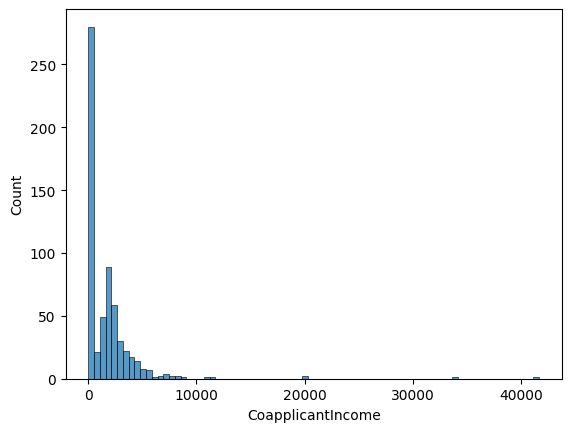

In [ ]:
sns.histplot(df['CoapplicantIncome'])

In [ ]:
from sklearn.preprocessing import PowerTransformer
trans=PowerTransformer(method='yeo-johnson')

In [ ]:
la_trans=trans.fit_transform(df[['CoapplicantIncome']])
la_trans.shape

(614, 1)

In [ ]:
print("Skewness : ",pd.Series(la_trans.reshape(614,)).skew())
print("Kurtosis : ",pd.Series(la_trans.reshape(614,)).kurtosis())

Skewness :  -0.14564645710551902
Kurtosis :  -1.8778432766544493


<Axes: ylabel='Count'>

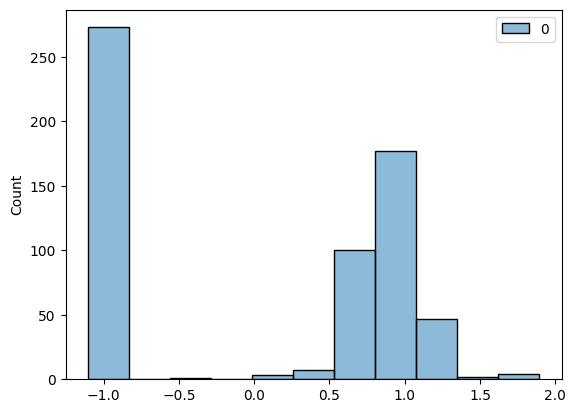

In [ ]:
sns.histplot(la_trans)

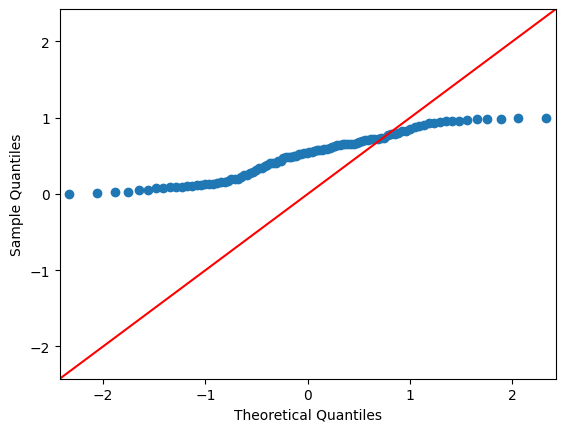

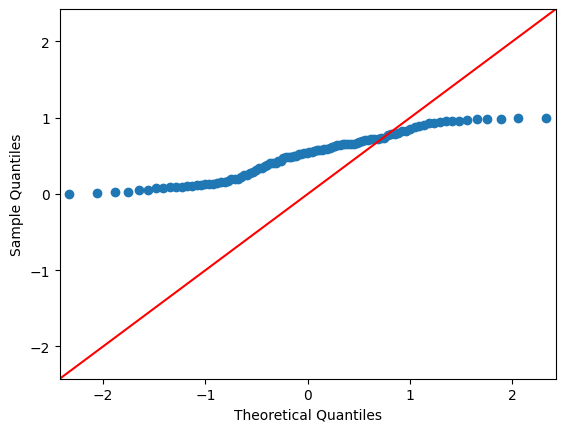

In [ ]:
import pylab as py
import numpy as np
import statsmodels.api as sm

data=np.random.rand(100)
sm.qqplot(data,line='45')  #data is not normally distributed